### Data Aggregation
- Problem Statement: Analyzing Sales Performance by Region in a Retail Company
- Dataset: "Retail_Sales_Data.csv"
- Description: The dataset contains information about sales transactions in a retail company. It
includes attributes such as transaction date, product category, quantity sold, and sales
amount. 
- The goal is to perform data aggregation to analyze the sales performance by region
and identify the top-performing regions.
#### Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales
amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across
different regions and product categories.

### Exam specific
3. Identify the relevant variables for aggregating sales data, such as region, sales
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.

In [12]:
import pandas as pd

In [13]:
sales_data = pd.read_csv('retail_sales_data.csv')
sales_data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [14]:
sales_data.shape

(9994, 11)

To analyze the sales performance by region and identify the top-performing regions, we'll focus on the Region, Sales, and Category variables. We will aggregate the sales data by region to calculate the total sales amount for each region and then visualize the sales distribution by region. Additionally, we'll group the sales data by region and product category to observe the total sales for each combination and create visualizations for comparison.

In [15]:
# Group the sales data by region and calculate the total sales amount for each region
sales_by_region = sales_data.groupby('Region')['Sales'].sum().reset_index()
sales_by_region

,Region,Sales
0,Central,3468156
1,East,4248368
2,North,1254
3,South,2440461
4,West,4798743


In [19]:
# Sort the regions by sales amount in descending order to identify the top-performing regions
top_regions = sales_by_region.sort_values('Sales', ascending=False).reset_index(drop=True)

# Group the sales data by region and product category to calculate the total sales amount for each combination
sales_by_region_category = sales_data.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Sort the sales by region and category
sales_by_region_category_sorted = sales_by_region_category.sort_values(['Region', 'Sales'], ascending=[True, False])

print(top_regions)
print("\nTop Categories Per Region: ")
sales_by_region_category_sorted.head()  # Display top regions and top categories per region (top 5)

    Region    Sales
0     West  4798743
1     East  4248368
2  Central  3468156
3    South  2440461
4    North     1254

Top Categories Per Region: 


,Region,Category,Sales
6,Central,Snacks,558494
4,Central,Fruits & Veggies,526507
2,Central,"Eggs, Meat & Fish",516642
1,Central,Beverages,501194
3,Central,Food Grains,463683


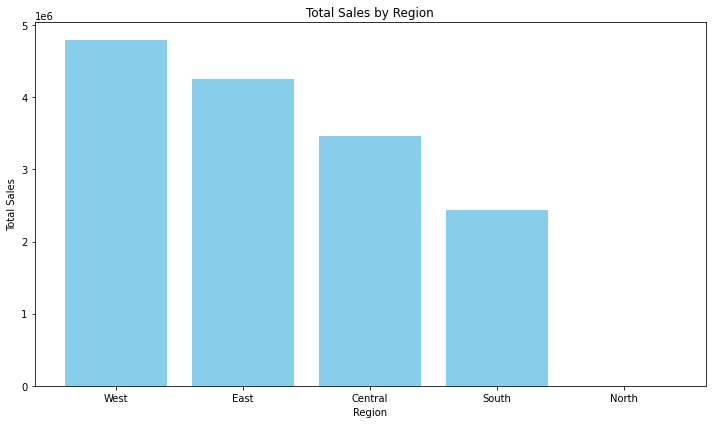

In [21]:
import matplotlib.pyplot as plt

# Bar plot for sales distribution by region
plt.figure(figsize=(10, 6))
plt.bar(top_regions['Region'], top_regions['Sales'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the bar plot
plt.show()


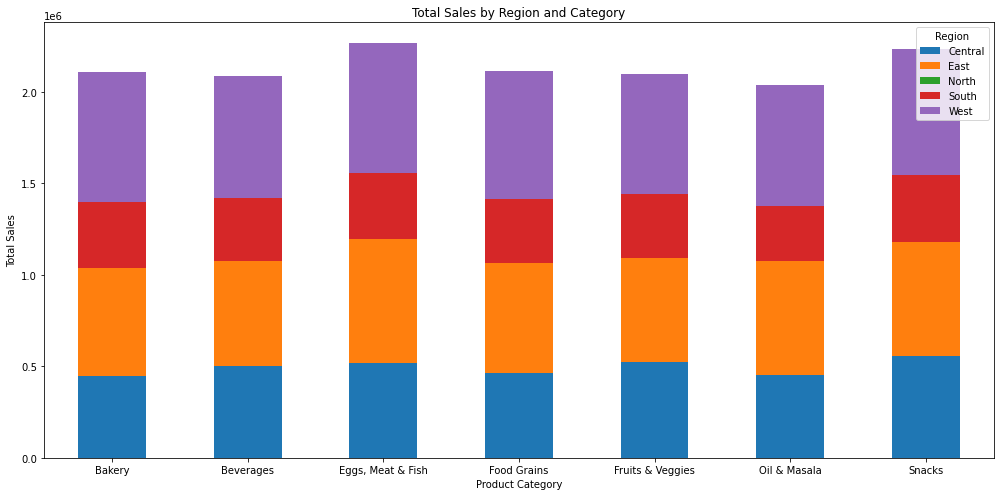

In [23]:
# Pivot table for creating stacked bar plot with sales by region and category
sales_pivot = sales_by_region_category.pivot(index='Category', columns='Region', values='Sales').fillna(0)

# Stacked bar plot for sales distribution by region and category
sales_pivot.plot(kind='bar', stacked=True, figsize=(14, 7))

# Adding titles and labels
plt.title('Total Sales by Region and Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Region')

# Show the plot
plt.tight_layout()
plt.show()
